<a href="https://colab.research.google.com/github/madisonb2/CS4765/blob/SVM/CS4765.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install datasets pandas numpy matplotlib seaborn nltk seaborn kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [9]:
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import kagglehub
import os
import xml.etree.ElementTree as ET
# Download latest version
path = kagglehub.dataset_download("charitarth/semeval-2014-task-4-aspectbasedsentimentanalysis")

print("Path to dataset files:", path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


100%|██████████| 954k/954k [00:00<00:00, 52.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/charitarth/semeval-2014-task-4-aspectbasedsentimentanalysis/versions/4


In [67]:
# List all files and directories in the download path
for root, dirs, files in os.walk(path):
    print("Directory:", root)
    print("Subdirectories:", dirs)
    print("Files:", files)
    print("-" * 40)

Directory: /root/.cache/kagglehub/datasets/charitarth/semeval-2014-task-4-aspectbasedsentimentanalysis/versions/4
Subdirectories: []
Files: ['restaurants-trial.xml', 'SemEvalSchema.xsd', 'Restaurants_Train_v2.xml', 'Restaurants_Test_Data_PhaseB.csv', 'Laptops_Test_Data_PhaseB.csv', 'Laptops_Test_Data_PhaseA.xml', 'Restaurants_Test_Data_PhaseA.csv', 'Restaurants_Train.xml', 'Laptop_Train_v2.csv', 'laptops-trial.xml', 'Restaurants_Test_Data_PhaseA.xml', 'Laptop_Train_v2.xml', 'Laptops_Test_Data_PhaseA.csv', 'Restaurants_Train_v2.csv', 'laptops-trial.csv', 'Restaurants_Test_Data_phaseB.xml', 'Laptops_Test_Data_phaseB.xml', 'restaurants-trial.csv']
----------------------------------------


In [69]:
def load_csv_data(filename):
    file_path = os.path.join(path, filename)

    return pd.read_csv(file_path)

In [86]:


def parse_xml_data(filename):
    file_path = os.path.join(path, filename)
    print(f"Parsing XML file: {file_path}")

    # Check if file exists
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return pd.DataFrame()  # Return empty DataFrame if file doesn't exist

    # Parse the XML with encoding handling
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            tree = ET.parse(file)
            root = tree.getroot()
    except ET.ParseError as e:
        print(f"Error parsing XML: {e}")
        return pd.DataFrame()  # Return empty DataFrame if parsing fails

    data = []
    for sentence in root.findall('.//sentence'):
        text_element = sentence.find('text')
        text = text_element.text if text_element is not None else "No text found"
        sent_id = sentence.get('id')


        aspects = sentence.findall('aspectTerms/aspectTerm')
        if aspects:
            for aspect in aspects:
                term = aspect.get('term')
                polarity = aspect.get('polarity', 'unknown')
                aspect_from = aspect.get('from')
                aspect_to = aspect.get('to')

                # Safely convert 'from' and 'to' to integers if they exist
                try:
                    from_pos = int(aspect_from) if aspect_from else None
                    to_pos = int(aspect_to) if aspect_to else None
                except ValueError:
                    from_pos, to_pos = None, None
                    print(f"Warning: Invalid 'from' or 'to' values in aspect: {aspect}")

                data.append({
                    'sentence_id': sent_id,
                    'text': text,
                    'aspect_term': term,
                    'polarity': polarity,
                    'from': from_pos,
                    'to': to_pos
                })

    # Convert to DataFrame
    df = pd.DataFrame(data)
    if df.empty:
        print("Warning: Parsed XML, but no data was found.")
    return df

In [72]:
# Load both laptop and restaurant datasets
laptops_train_csv = load_csv_data('Laptop_Train_v2.csv')
laptops_train_xml = parse_xml_data('Laptop_Train_v2.xml')
restaurants_train_csv = load_csv_data('Restaurants_Train_v2.csv')
restaurants_train_xml = parse_xml_data('Restaurants_Train_v2.xml')

In [94]:

# laptops_test_xml_A = parse_xml_data('Laptops_Test_Data_PhaseA.xml')
laptops_test_xml = parse_xml_data('Laptops_Test_Data_phaseB.xml')
# restaurants_test_xml_A = parse_xml_data('Restaurants_Test_Data_PhaseA.xml')
restaurants_test_xml = parse_xml_data('Restaurants_Test_Data_phaseB.xml')


Parsing XML file: /root/.cache/kagglehub/datasets/charitarth/semeval-2014-task-4-aspectbasedsentimentanalysis/versions/4/Laptops_Test_Data_phaseB.xml
Parsing XML file: /root/.cache/kagglehub/datasets/charitarth/semeval-2014-task-4-aspectbasedsentimentanalysis/versions/4/Restaurants_Test_Data_phaseB.xml


In [89]:
print(restaurants_test_xml_B.head())
print(laptops_test_xml_B.head())

         sentence_id                                               text  \
0  32897564#894393#2                    The bread is top notch as well.   
1  33070600#670328#0  I have to say they have one of the fastest del...   
2  33070600#670328#2        Food is always fresh and hot- ready to eat!   
3  36244464#949326#5      Did I mention that the coffee is OUTSTANDING?   
4  32894246#870052#0  Certainly not the best sushi in New York, howe...   

      aspect_term polarity  from  to  
0           bread  unknown     4   9  
1  delivery times  unknown    43  57  
2            Food  unknown     0   4  
3          coffee  unknown    23  29  
4           sushi  unknown    23  28  
  sentence_id                                               text  \
0       892:1  Boot time is super fast, around anywhere from ...   
1      1144:1  tech support would not fix the problem unless ...   
2       359:1                                   Set up was easy.   
3       562:1  Did not enjoy the new Window

In [13]:
print("\nDataset sizes:")
print(f"Laptops CSV: {len(laptops_train_csv)} records")
print(f"Laptops XML: {len(laptops_train_xml)} records")
print(f"Restaurants CSV: {len(restaurants_train_csv)} records")
print(f"Restaurants XML: {len(restaurants_train_xml)} records")


Dataset sizes:
Laptops CSV: 2358 records
Laptops XML: 2358 records
Restaurants CSV: 3693 records
Restaurants XML: 3693 records


In [14]:
laptops_train_csv.head()

,id,Sentence,Aspect Term,polarity,from,to
0,2339,I charge it at night and skip taking the cord ...,cord,neutral,41,45
1,2339,I charge it at night and skip taking the cord ...,battery life,positive,74,86
2,1316,The tech guy then said the service center does...,service center,negative,27,41
3,1316,The tech guy then said the service center does...,"""sales"" team",negative,109,121
4,1316,The tech guy then said the service center does...,tech guy,neutral,4,12


In [15]:
# Basic dataset analysis
def analyze_dataset(df, domain_name):
    print(f"\n=== {domain_name} Dataset Analysis ===")

    # Add length features
    df['text_length'] = df['Sentence'].str.len()
    df['aspect_length'] = df['Aspect Term'].str.len()

    # Basic statistics
    print("\nSentiment distribution:")
    sentiment_dist = df['polarity'].value_counts(normalize=True) * 100
    print(sentiment_dist)

    # Aspect analysis
    aspect_counts = Counter(df['Aspect Term'])
    print(f"\nTotal unique aspects: {len(aspect_counts)}")
    print("\nTop 10 most common aspects:")
    for aspect, count in aspect_counts.most_common(10):
        print(f"{aspect}: {count}")

    return df

In [16]:
laptops_train_csv = analyze_dataset(laptops_train_csv, "Laptops (CSV)")
restaurants_train_csv = analyze_dataset(restaurants_train_csv, "Restaurants (CSV)")



=== Laptops (CSV) Dataset Analysis ===

Sentiment distribution:
polarity
positive    41.857506
negative    36.726039
neutral     19.508058
conflict     1.908397
Name: proportion, dtype: float64

Total unique aspects: 1042

Top 10 most common aspects:
screen: 58
price: 55
use: 53
battery life: 52
battery: 45
keyboard: 43
programs: 36
software: 33
features: 32
warranty: 31

=== Restaurants (CSV) Dataset Analysis ===

Sentiment distribution:
polarity
positive    58.597346
negative    21.797996
neutral     17.140536
conflict     2.464121
Name: proportion, dtype: float64

Total unique aspects: 1288

Top 10 most common aspects:
food: 357
service: 206
place: 64
prices: 60
menu: 57
staff: 56
dinner: 55
atmosphere: 49
pizza: 43
table: 41


In [17]:
# Visualization functions
def plot_sentiment_distribution(df, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='polarity')
    plt.title(f'Sentiment Distribution - {title}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [18]:
def plot_text_lengths(df, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='text_length', bins=50)
    plt.title(f'Text Length Distribution - {title}')
    plt.xlabel('Text Length')
    plt.tight_layout()
    plt.show()

In [19]:
def plot_aspect_distribution(df, title):
    top_aspects = df['Aspect Term'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    top_aspects.plot(kind='bar')
    plt.title(f'Top 10 Aspects - {title}')
    plt.xlabel('Aspect Term')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [20]:
def plot_aspect_sentiment_heatmap(df, title):
    # Create pivot table for aspect-sentiment relationship
    top_aspects = df['Aspect Term'].value_counts().head(10).index
    aspect_sentiment = pd.crosstab(
        df[df['Aspect Term'].isin(top_aspects)]['Aspect Term'],
        df[df['Aspect Term'].isin(top_aspects)]['polarity']
    )

    plt.figure(figsize=(12, 8))
    sns.heatmap(aspect_sentiment, annot=True, fmt='d', cmap='YlOrRd')
    plt.title(f'Aspect-Sentiment Distribution - {title}')
    plt.xlabel('Sentiment')
    plt.ylabel('Aspect Term')
    plt.tight_layout()
    plt.show()


Generating visualizations for laptops dataset...


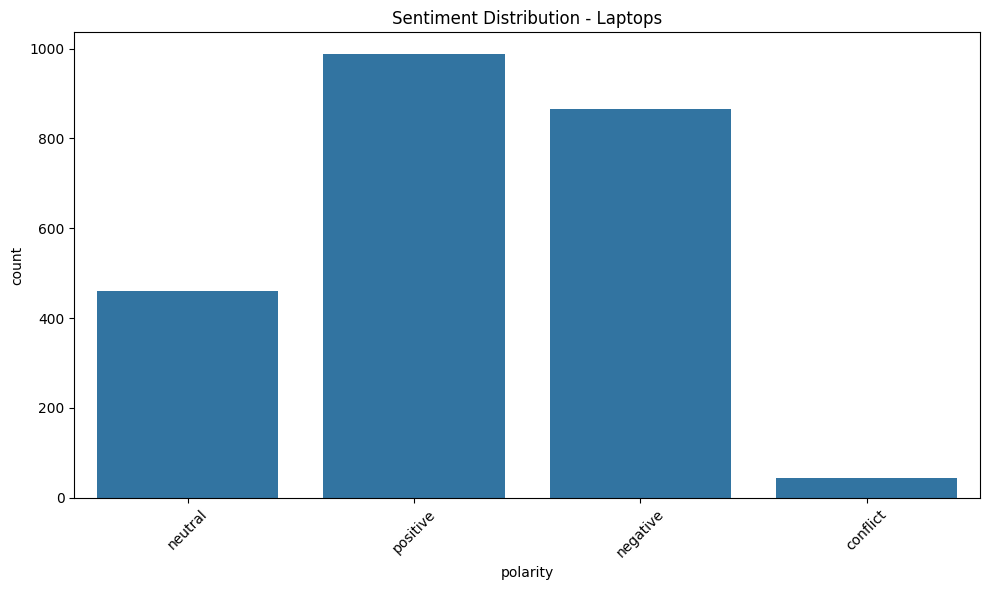

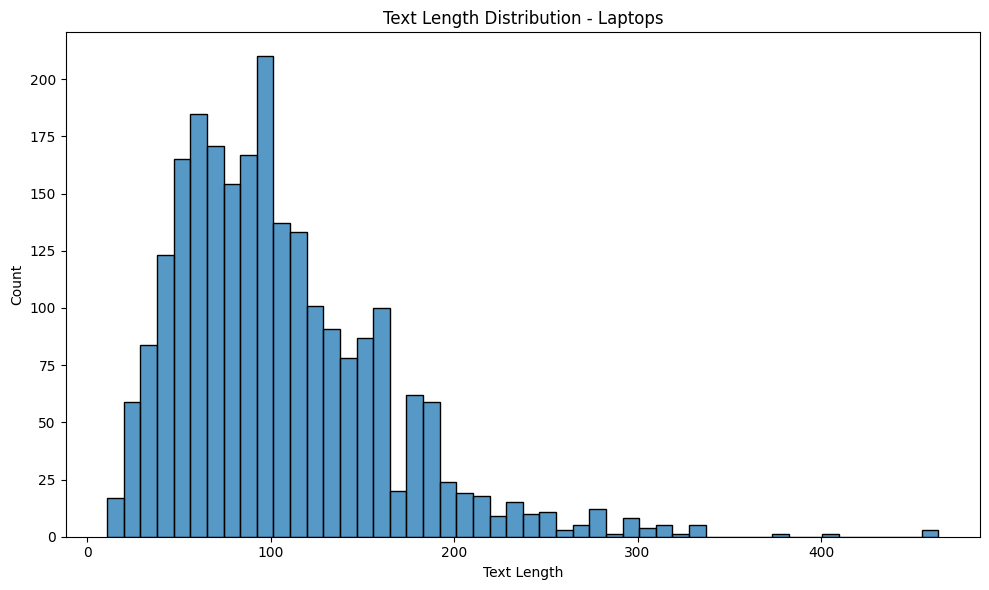

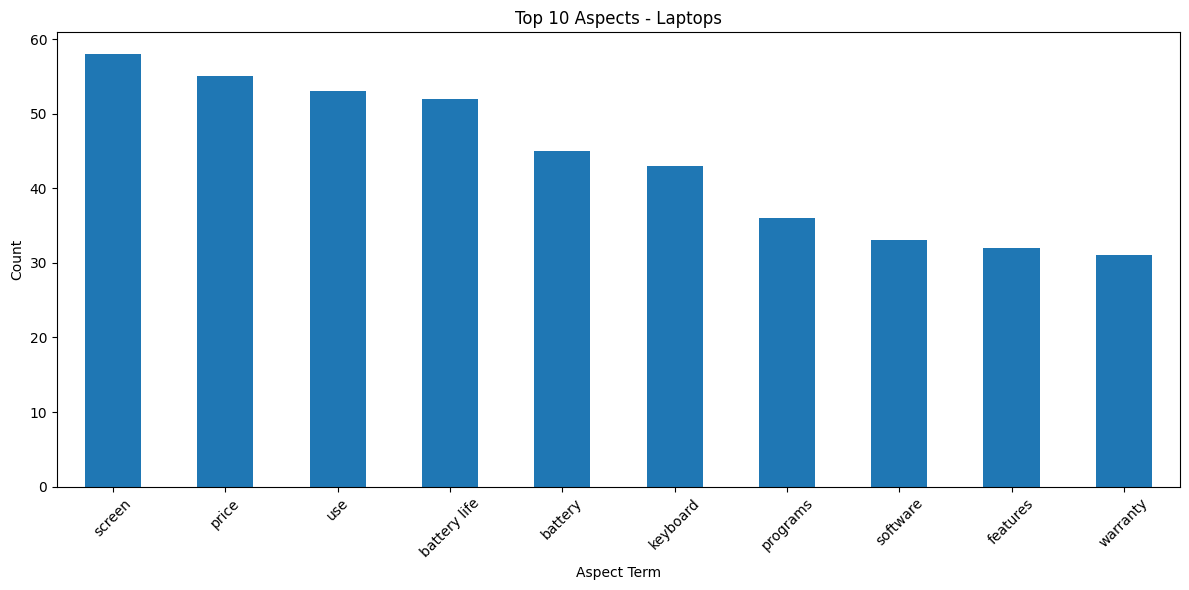

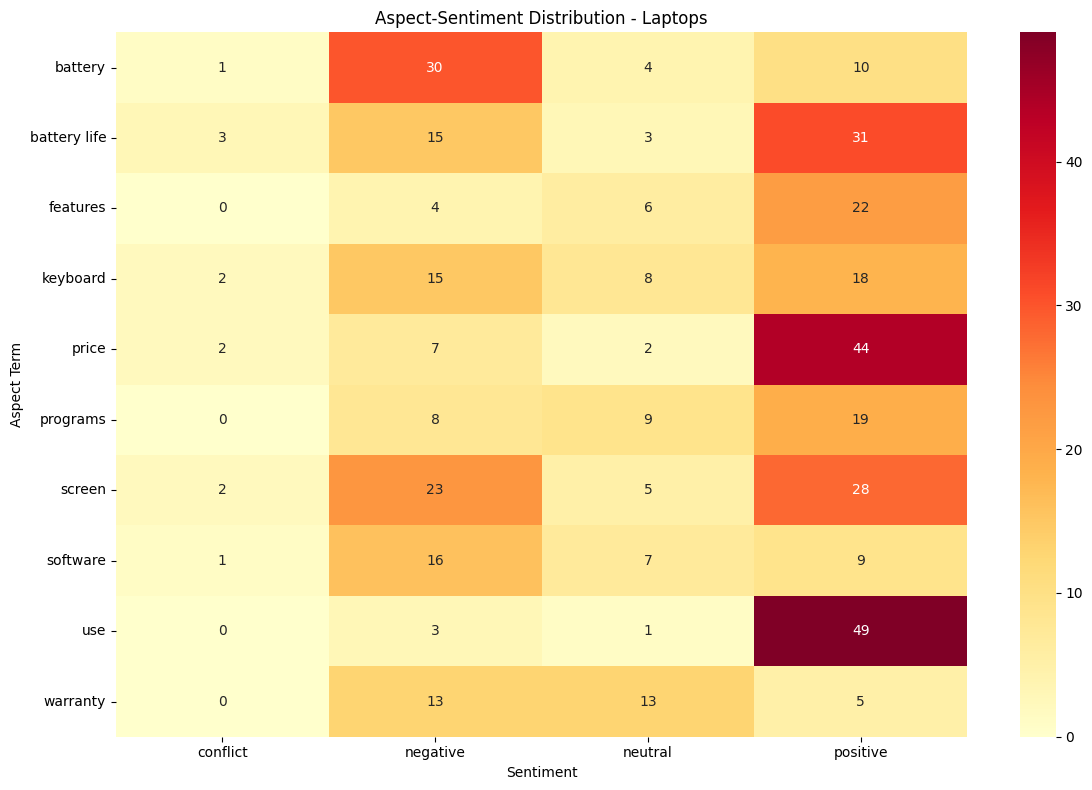


Generating visualizations for restaurants dataset...


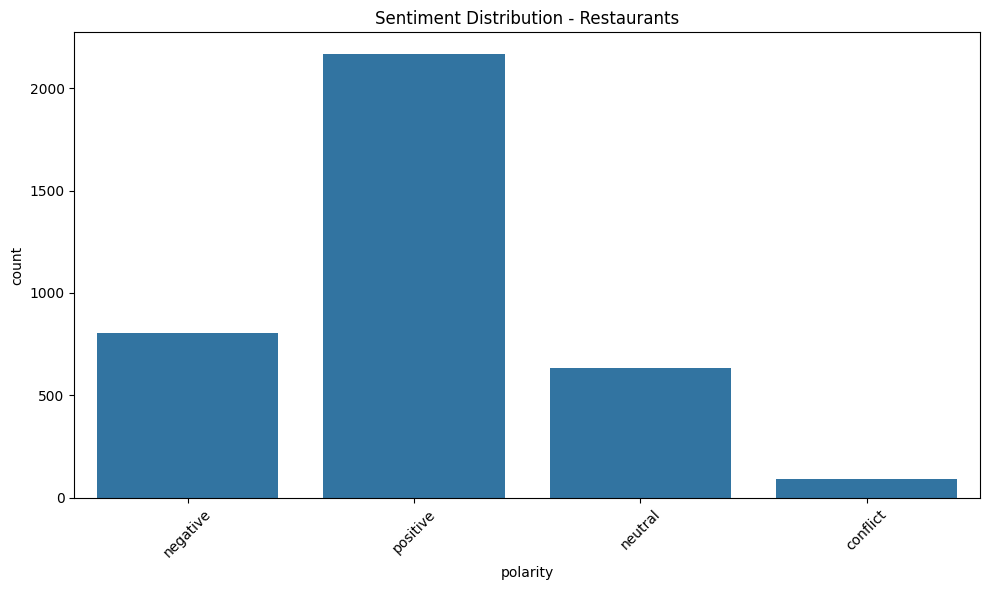

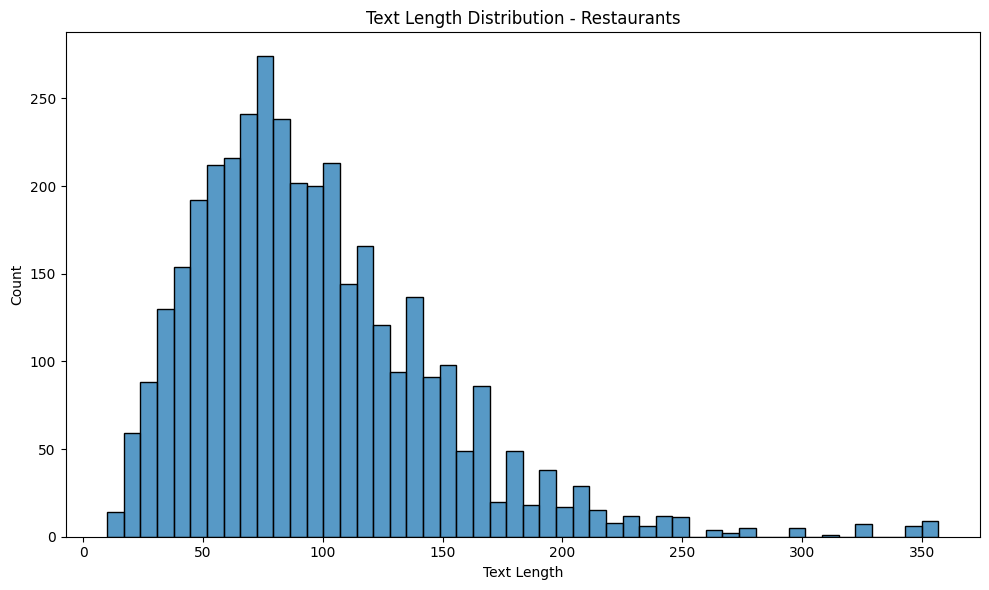

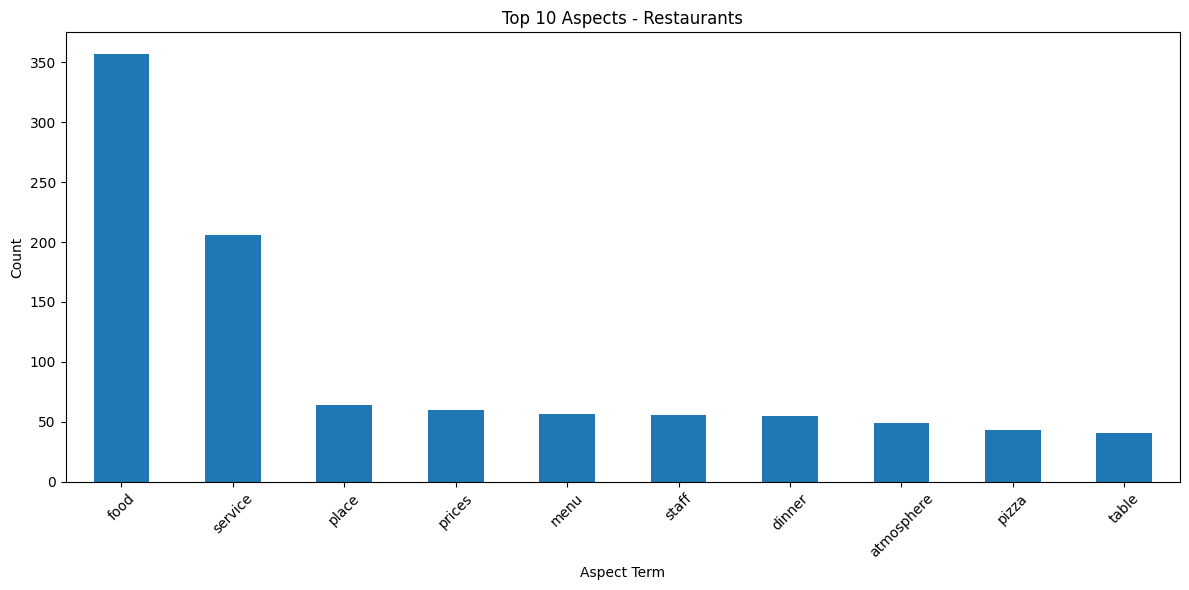

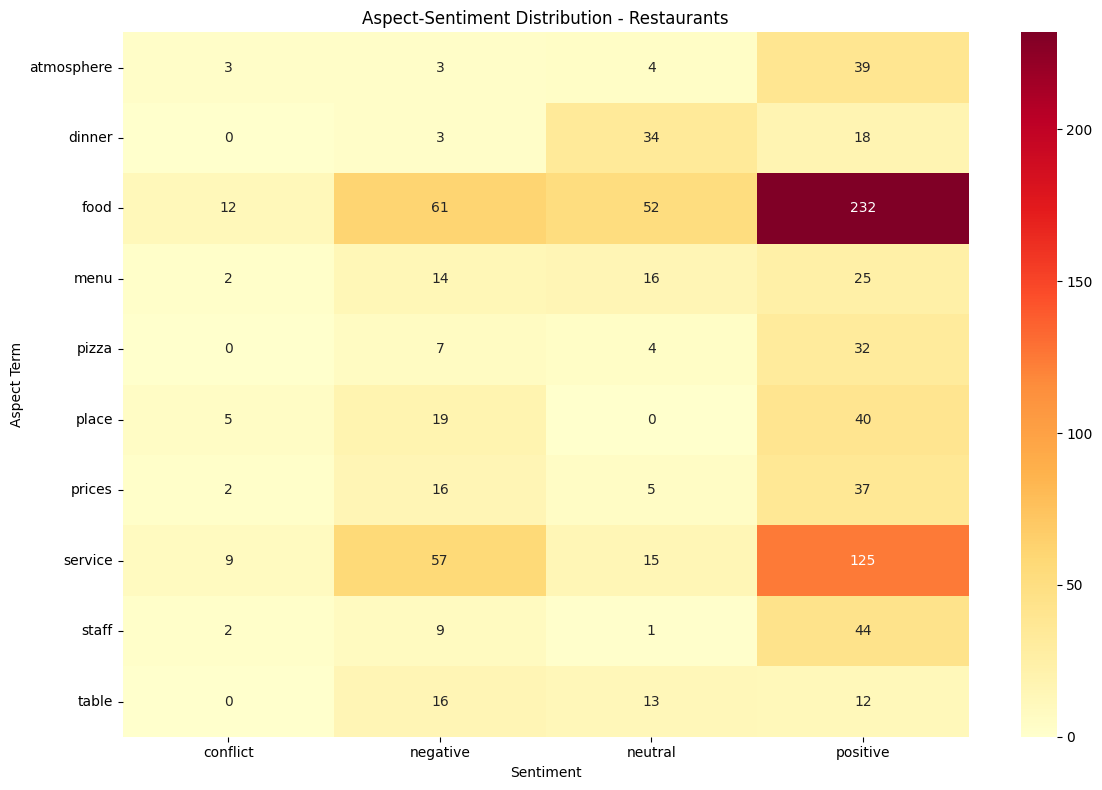

In [21]:
# Generate visualizations for laptops dataset
print("\nGenerating visualizations for laptops dataset...")
plot_sentiment_distribution(laptops_train_csv, "Laptops")
plot_text_lengths(laptops_train_csv, "Laptops")
plot_aspect_distribution(laptops_train_csv, "Laptops")
plot_aspect_sentiment_heatmap(laptops_train_csv, "Laptops")

# Generate visualizations for restaurants dataset
print("\nGenerating visualizations for restaurants dataset...")
plot_sentiment_distribution(restaurants_train_csv, "Restaurants")
plot_text_lengths(restaurants_train_csv, "Restaurants")
plot_aspect_distribution(restaurants_train_csv, "Restaurants")
plot_aspect_sentiment_heatmap(restaurants_train_csv, "Restaurants")

In [22]:
# Function to get sample reviews
def display_sample_reviews(df, domain_name, n=5):
    samples = df.sample(n)
    print(f"\n=== Sample Reviews from {domain_name} Dataset ===")
    for _, row in samples.iterrows():
        print(f"\nText: {row['Sentence']}")
        print(f"Aspect: {row['Aspect Term']}")
        print(f"Sentiment: {row['polarity']}")
        print("-" * 50)

In [23]:
# Display sample reviews
display_sample_reviews(laptops_train_csv, "Laptops")
display_sample_reviews(restaurants_train_csv, "Restaurants")



=== Sample Reviews from Laptops Dataset ===

Text: lightweight, long battery life, excellent transition from PC;
Aspect: battery life
Sentiment: positive
--------------------------------------------------

Text: Its Office compatible, but the features and its functioning is all new again so you might as well save the money and just learn the pre installed mac programs.
Aspect: programs
Sentiment: neutral
--------------------------------------------------

Text: This purchase opened me to the world of Macbooks, and I am impressed with the intuition of the design, the beauty of the product, and the excellent technological advances associated with it.
Aspect: design
Sentiment: positive
--------------------------------------------------

Text: I love its solid build, light wt and excellent battery life (for now).
Aspect: wt
Sentiment: positive
--------------------------------------------------

Text: iLife is easily compatible with Microsoft Office so you can send and receive files from a

In [24]:
# Additional analysis: Aspect length statistics
def analyze_aspect_lengths(df, domain_name):
    print(f"\n=== Aspect Length Analysis for {domain_name} ===")
    print(df['aspect_length'].describe())

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, y='aspect_length')
    plt.title(f'Aspect Length Distribution - {domain_name}')
    plt.tight_layout()
    plt.show()


=== Aspect Length Analysis for Laptops ===
count    2358.000000
mean        9.422392
std         5.166523
min         2.000000
25%         6.000000
50%         8.000000
75%        12.000000
max        43.000000
Name: aspect_length, dtype: float64


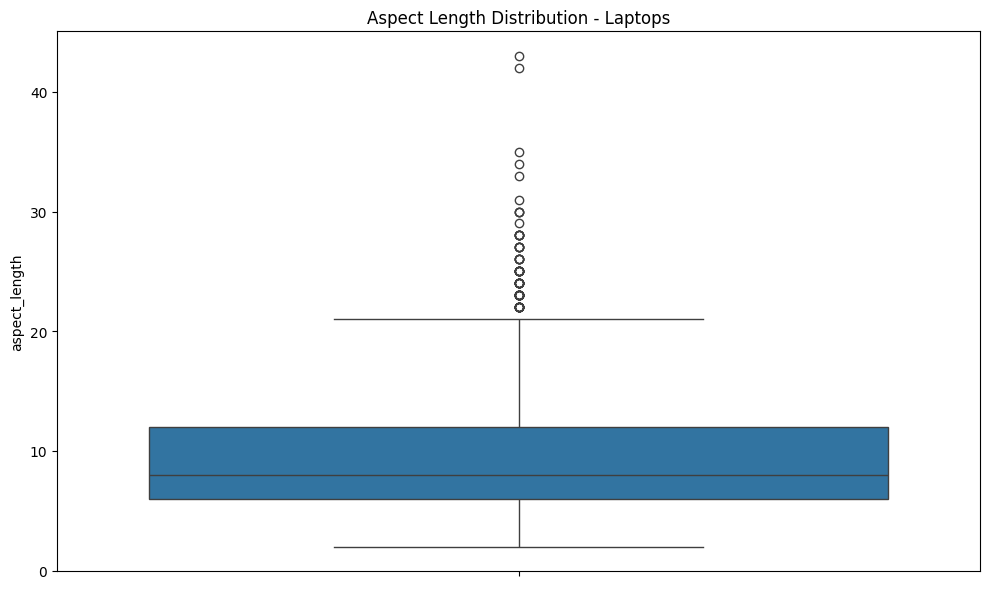


=== Aspect Length Analysis for Restaurants ===
count    3693.000000
mean        8.237476
std         6.074758
min         2.000000
25%         5.000000
50%         6.000000
75%        10.000000
max       115.000000
Name: aspect_length, dtype: float64


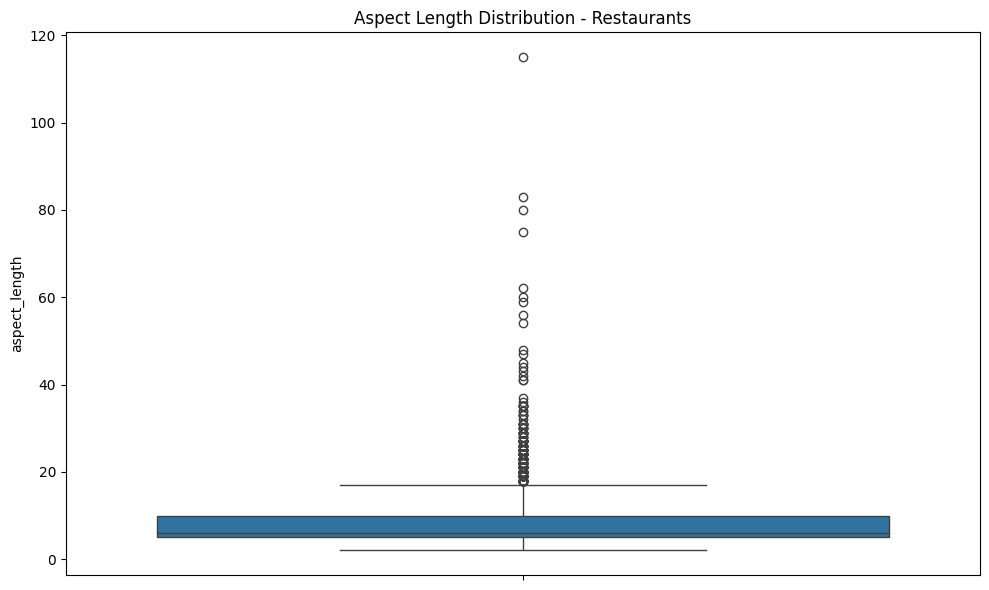

In [25]:
analyze_aspect_lengths(laptops_train_csv, "Laptops")
analyze_aspect_lengths(restaurants_train_csv, "Restaurants")

In [26]:
# Compare sentiment distributions between domains
def compare_domains_sentiment(laptops_df, restaurants_df):
    plt.figure(figsize=(12, 6))

    # Calculate percentages
    laptops_sent = laptops_df['polarity'].value_counts(normalize=True) * 100
    restaurants_sent = restaurants_df['polarity'].value_counts(normalize=True) * 100

    # Create comparison DataFrame
    comparison_df = pd.DataFrame({
        'Laptops': laptops_sent,
        'Restaurants': restaurants_sent
    })

    # Plot
    comparison_df.plot(kind='bar')
    plt.title('Sentiment Distribution Comparison between Domains')
    plt.xlabel('Sentiment')
    plt.ylabel('Percentage')
    plt.legend(title='Domain')
    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

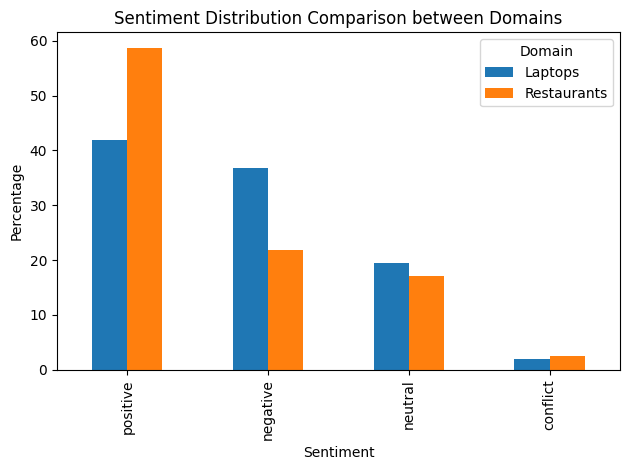

In [27]:
compare_domains_sentiment(laptops_train_csv, restaurants_train_csv)

In [103]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [92]:
def load_semeval_data(laptops_train_xml, laptops_test_xml, restaurants_train_xml, restaurants_test_xml):
    """
    Load the SemEval 2014 Task 4 dataset from the provided XML DataFrames.
    Returns X (text), y (labels) for both train and test sets.
    """
    # Load train data
    X_train = pd.concat([laptops_train_xml['text'], restaurants_train_xml['text']], ignore_index=True)
    y_train = pd.concat([laptops_train_xml['polarity'], restaurants_train_xml['polarity']], ignore_index=True)

    # Load test data
    X_test = pd.concat([laptops_test_xml['text'], restaurants_test_xml['text']], ignore_index=True)
    y_test = pd.concat([laptops_test_xml['polarity'], restaurants_test_xml['polarity']], ignore_index=True)

    return X_train, y_train, X_test, y_test


In [49]:
# def vectorize_text(X_train, X_test):
#     """
#     Vectorize the text data using TF-IDF.
#     Returns the vectorized training and test data.
#     """
#     from sklearn.feature_extraction.text import TfidfVectorizer
#     vectorizer = TfidfVectorizer()
#     X_train_vectorized = vectorizer.fit_transform(X_train)
#     X_test_vectorized = vectorizer.transform(X_test)
#     return X_train_vectorized, X_test_vectorized

In [50]:
# def analyze_dataset(df, domain_name):
#     print(f"\n=== {domain_name} Dataset Analysis ===")

#     # Add length features
#     df['text_length'] = df['Sentence'].str.len()
#     df['aspect_length'] = df['Aspect Term'].str.len()

#     # Basic statistics
#     print("\nSentiment distribution:")
#     sentiment_dist = df['polarity'].value_counts(normalize=True) * 100
#     print(sentiment_dist)

#     # Aspect analysis
#     aspect_counts = Counter(df['Aspect Term'])
#     print(f"\nTotal unique aspects: {len(aspect_counts)}")
#     print("\nTop 10 most common aspects:")
#     for aspect, count in aspect_counts.most_common(10):
#         print(f"{aspect}: {count}")

#     return df

In [108]:
def train_svm(laptops_train_xml, laptops_test_xml, restaurants_train_xml, restaurants_test_xml):
    # Load the SemEval 2014 Task 4 dataset
    X_train, y_train, X_test, y_test = load_semeval_data(laptops_train_xml, laptops_test_xml, restaurants_train_xml, restaurants_test_xml)

    # Vectorize the text data
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    print()
    # Train an SVM classifier
    svm = SVC(kernel='linear', C=1.0)
    svm.fit(X_train_vectorized, y_train)

    # Evaluate the model on the test set
    y_pred = svm.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'Accuracy: {accuracy:.2f}')
    print(f'F1-score: {f1:.2f}')

    return svm


In [109]:
svm_model = train_svm( laptops_train_xml, laptops_test_xml,
                restaurants_train_xml, restaurants_test_xml)


Accuracy: 0.00
F1-score: 0.00


**BELOW code only uses training data for validation using 80-20 split**

In [114]:
def load_semeval_data_val(laptops_train_csv, laptops_train_xml, restaurants_train_csv, restaurants_train_xml):
    """
    Load the SemEval 2014 Task 4 dataset from the provided CSV and XML files.
    Returns X (text), y (labels).
    """
    # Combine the laptop and restaurant data using pd.concat
    X = pd.concat([laptops_train_csv['Sentence'], restaurants_train_csv['Sentence']], ignore_index=True).tolist()
    y = pd.concat([laptops_train_csv['polarity'], restaurants_train_csv['polarity']], ignore_index=True).tolist()

    # Parse the XML data and add it to X and y
    for xml_data in [laptops_train_xml, restaurants_train_xml]:
        for aspect in xml_data.to_dict('records'):  # Iterate through rows as dictionaries
            X.append(aspect['text'])
            y.append(aspect['polarity'])

    # Convert lists to Series
    X = pd.Series(X)
    y = pd.Series(y)

    return X, y

In [111]:
def vectorize_text_val(X_train, X_test):
    """
    Vectorize the text data using TF-IDF.
    Returns the vectorized training and test data.
    """
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
    return X_train_vectorized, X_test_vectorized

In [112]:
# def analyze_dataset_val(df, domain_name):
#     print(f"\n=== {domain_name} Dataset Analysis ===")

#     # Add length features
#     df['text_length'] = df['Sentence'].str.len()
#     df['aspect_length'] = df['Aspect Term'].str.len()

#     # Basic statistics
#     print("\nSentiment distribution:")
#     sentiment_dist = df['polarity'].value_counts(normalize=True) * 100
#     print(sentiment_dist)

#     # Aspect analysis
#     aspect_counts = Counter(df['Aspect Term'])
#     print(f"\nTotal unique aspects: {len(aspect_counts)}")
#     print("\nTop 10 most common aspects:")
#     for aspect, count in aspect_counts.most_common(10):
#         print(f"{aspect}: {count}")

#     return df

In [115]:
# Load the SemEval 2014 Task 4 dataset
X, y = load_semeval_data_val(laptops_train_csv, laptops_train_xml, restaurants_train_csv, restaurants_train_xml)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
X_train_vectorized, X_test_vectorized = vectorize_text_val(X_train, X_test)

# Train an SVM classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = svm.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.81
F1-score: 0.80
